<a href="https://colab.research.google.com/github/urvashi2004/ML_MiniProjects/blob/main/DeepLearning/IC_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 59s 121ms/step - loss: 0.6609 - accuracy: 0.7588 - val_loss: 0.4256 - val_accuracy: 0.8442
Epoch 2/10
469/469 [==============================] - 48s 103ms/step - loss: 0.4262 - accuracy: 0.8455 - val_loss: 0.3572 - val_accuracy: 0.8667
Epoch 3/10
469/469 [==============================] - 49s 105ms/step - loss: 0.3718 - accuracy: 0.8661 - val_loss: 0.3352 - val_accuracy: 0.8746
Epoch 4/10
469/469 [==============================] - 52s 112ms/step - loss: 0.3380 - accuracy: 0.8784 - val_loss: 0.3080 - val_accuracy: 0.8874
Epoch 5/10
469/469 [==============================] - 48s 102ms/step - loss: 0.3142 - accuracy: 0.8860 - val_loss: 0.2872 - val_accuracy: 0.8949
Epoch 6/10
469/469 [==============================] - 51s 109ms/step - loss: 0.2968 - accuracy: 0.8924 - val_loss: 0.2951 - val_accuracy: 0.8956
Epoch 7/10
469/469 [==============================] - 48s 103ms/ste

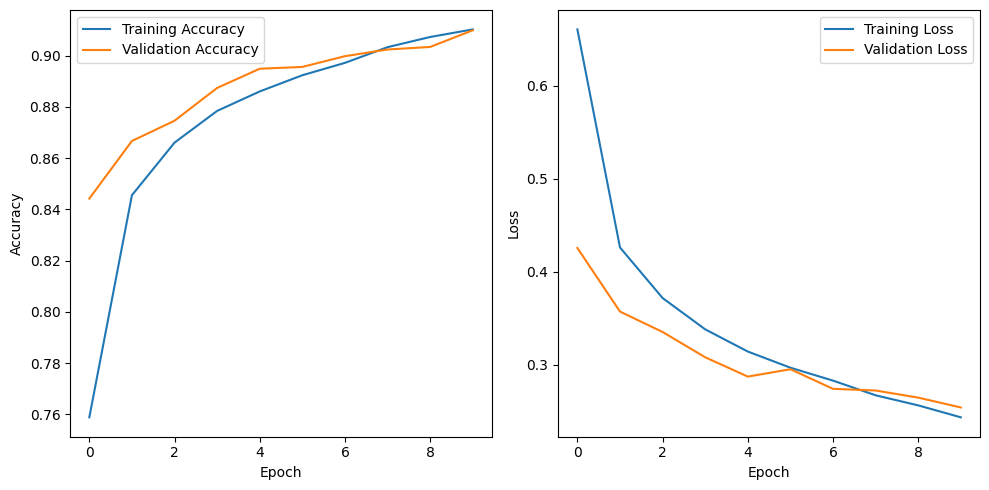

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape input data to fit the model
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Saving bag.png to bag.png


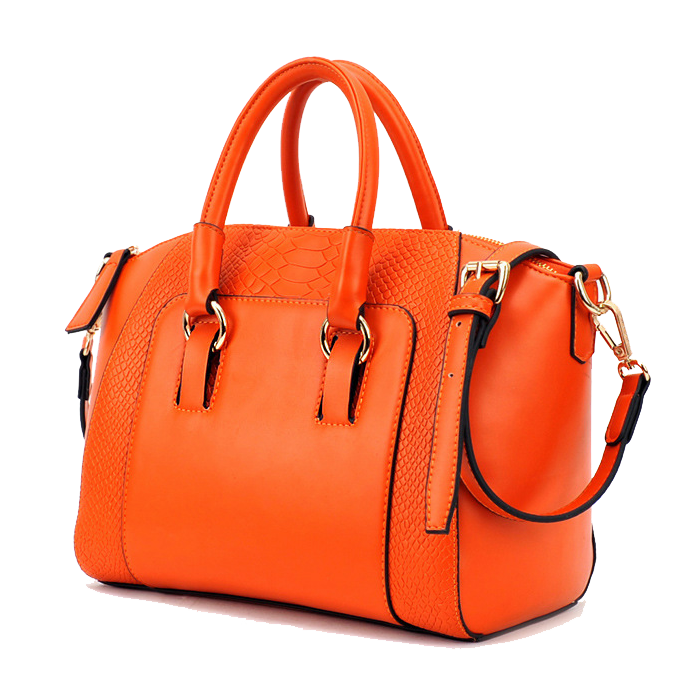

1/1 [==============================] - 0s 165ms/step
Predicted Class: Bag


In [2]:
from tensorflow.keras.preprocessing import image as keras_image
from IPython.display import display, Image
import io
from google.colab import files

def classify_uploaded_image(model):
    # Upload an image in Google Colab
    uploaded = files.upload()
    img_path = next(iter(uploaded))

    # Load and preprocess the image
    img = keras_image.load_img(io.BytesIO(uploaded[img_path]), target_size=(28, 28), color_mode='grayscale')
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Display the uploaded image
    display(Image(data=uploaded[img_path]))

    # Classify the image
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    class_name = classes[class_idx]

    print(f'Predicted Class: {class_name}')

classify_uploaded_image(model)